![example](images/director_shot.jpeg)

# Phase 1 Project: 
## Microsoft Movie Studio: Data-Driven Decisions for Success 


**Authors:**  Fredrick Munyao Kyeki
***

## Overview
The project aims to provide data-driven insights to support Microsoft's new movie studio in establishing a successful presence in the movie industry. The business problem revolves around Microsoft's lack of expertise in film-making and the need to make informed decisions for profitable movie production. I analyzed diverse movie datasets from IMDb, Box Office Mojo, and The Numbers to answer key data questions related to movie success. By exploring top-performing films, successful genres, budget impacts, seasonal trends, audience preferences, and competition, I derived actionable recommendations for Microsoft. 

The results suggest focusing on producing **Action, Adventure, Animation, Comedy, Documentary, Drama, Fantasy, Scifi, Thriller** movies with moderate budgets between **170,001,400- 255,001,400** , releasing them during peak movie-going seasons **August, December, July, June, May, November**, and creating audience-centric content that aligns with user preferences.

By leveraging data insights, Microsoft's new movie studio can strategically position itself to compete effectively and create compelling, revenue-generating films in the highly competitive movie market.

## Business Problem

Microsoft is entering the movie industry and wants to establish a successful movie studio. However, they lack expertise in the movie-making domain and need to make informed decisions to create profitable films. 

The business's pain points include
1. uncertainty about the types of movies that perform well at the box office, 
1. the preferences of the target audience,
1. and how to effectively compete in a crowded market.


The following are the **data questions** answered in this analysis:

**1. What types of films are currently performing best at the box office (based on box office gross)?**
- What are the characteristics of top-performing movies based on box office gross?
- Which movies have been the most successful financially?

**2. Which movie genres have been the most popular and successful over time?**
- What are the trends in genre preferences?
- What are the preferences of the target audience based on user ratings and reviews? 
- What type of content resonates well with the audience?

**3. How does the movie budget impact box office revenue, and can smaller budget films be profitable?**
- How does the movie budget affect box office revenue? 
- Can smaller budget films be profitable, and is there an optimal budget range?

**4. Are there seasonal trends in movie performance, and when is the best time to release a movie?**
- Are there seasonal patterns in movie performance? 
- When is the best time to release a movie for maximum revenue?

## Data Understanding
We will use movie-related datasets from various sources, including **IMDb, Box Office Mojo, and The Numbers**. The data represent diverse movies with information on performance, ratings, genres, budgets, and revenue. Key variables include movie title, genre, budget, box office gross, user ratings, and release date.

**Data Description**:
The data used for this project comes from multiple movie-related datasets from various sources, including:

1. **IMDb (Internet Movie Database)**:
    - **IMDB Basics**:
       - Dataset: imdb.title.basics
       - Description: Contains basic movie information like **movie_id, primary_title, original_title, start_year,
         runtime_minutes, genres**
       - Relationship to Data Analysis Questions: Provides information on movie genres and basic movie details required for genre analysis.

    - **IMDb Ratings**:
       - Dataset: imdb.title.ratings
       - Description: Contains **'movie_id', 'averagerating', 'numvotes'**
       - Relationship to Data Analysis Questions: Allows us to explore audience preferences based on user ratings and reviews.

2. **Box Office Mojo**:
   - Dataset: bom.movie_gross
   - Description: Contains box office gross information for movies. \
   i.e **'title', 'studio', 'domestic_gross', 'foreign_gross', 'year'**
   - Relationship to Data Analysis Questions: Essential for analyzing box office success and financial performance of movies.

3. **The Numbers**:
   - Dataset: tn.movie_budgets
   - Description: Contains movie financials, like **'id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
     'worldwide_gross'**
   - Relationship to Data Analysis Questions: Enables us to analyze the impact of movie budgets on box office revenue.

**Data Representation**:
The datasets represent a diverse sample of movies, including various genres, budgets, and performances. Each movie record contains attributes such as movie title, genre(s), budget, box office gross, user ratings, and release date.

**Target Variable**:
The target variable for this project is the **"worldwide gross"** of movies. Box office gross represents the total revenue generated by the movie in theaters and serves as an indicator of movie financial success.

**Properties of Variables of interest**:
- **Movie Name** - Categorical variable which is a textual label or name of the movie. 
- **Genre**: Categorical variable representing the type or category of the movie (e.g., Action, Drama, Comedy).
- **Budget**: Continuous variable representing the production cost or budget of the movie.
- **worldwide Gross**: Continuous variable representing the total revenue generated by the movie at the box office.
- **User Ratings**: Continuous variable representing the average ratings or scores given by users for the movie.
- **Release Date**: Temporal variable indicating the date when the movie was released in theaters.

These variables will be used to answer the data questions and derive actionable insights to guide Microsoft's new movie studio in making informed decisions for successful movie production. The analysis will focus on understanding the relationships between these variables and their impact on movie success and profitability.

## Data Preparation

The following describes the data cleaning process to remove any unwanted inconsistencies and operate on clean sensible data:


1. **Data Loading**: Load the required datasets, including imdb.title.basics, imdb.title.ratings, bom.movie_gross, and tn.movie_budgets, into the analysis environment.

2. **Data Cleaning**:
- Handle Missing Values: Identify and handle missing values appropriately for each dataset. Depending on the extent of missingness, we may choose to impute missing values, drop rows, or drop entire variables if they are not crucial for the analysis.
- Drop Irrelevant Variables: Remove irrelevant or redundant variables that do not contribute to the analysis questions or recommendations.
- Merge Data: Combine relevant datasets based on common keys (e.g., movie titles) to create a comprehensive dataset that includes essential movie information.

3. **Feature Engineering**:

- Calculate `Profit`: Create a new variable to calculate the profit for each movie by subtracting the budget from the box office gross. This will help us understand the financial performance of each movie.
- Calculate `foreign_gross`: from the difference between worldwide gross and domestic gross
4. **Handling Outliers**:

- Analyze and Address Outliers: Identify outliers in numeric variables like budget and box office gross. Outliers may affect our analysis, and we need to decide whether to remove or transform them based on their impact on the results.
- Consider Genre Outliers: In genre analysis, we may encounter less common or niche genres. We must decide whether to group them into broader genres or retain them as unique categories based on their significance.

The data needed for this analysis is of the following format:

   | Dataset|Type
    |:------|:----------|
    |IMDb (Internet Movie Database) |  .db file|
    |bom.movie_gross| .csv file|
    |The Numbers| .csv file|



The first step of data preparation was to load the environment:
1. Import the standard panckages  

In [248]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


%matplotlib inline

The ```imdb``` data is in ```*.db``` file, so to ease the operation, the following code describes a class that opens it, and encapsulates the data in a class  with all necessary attributes and methods required to operate it as a Pandas Dataframe

In [249]:
# Encapsulate the im.db file inside a class with all necessary attributes and 
# methods required to operate it as a Pandas Dataframe

class MovieDB:
    """Class that operates on the Database files (*.db) as Pandas DataFrames
    methods:
    ========
    1. MovieDB.tables() - returns pandas dataframe with all tables in db
    2. MovieDB.get(table_name : str) - gets the dataframe with arg table_name
        - alternative usage: MovieDB[table_name]
    3. MovieDB.keys() - returns pandas dataframe with all tables in db
    """

    def __init__(self, file_name):
        """MovieDB class constructor method"""
        if not file_name:
            raise ValueError("Please provide file to read")
        self.file = file_name
        self.conn = sqlite3.connect(self.file)

    def tables(self):
        """Method to return all tables in moviedb"""
        query = """
        SELECT name 
        FROM sqlite_master
        WHERE type = 'table';
        """
        tables = (pd.read_sql(query, self.conn))
        tables = list(tables['name'])
        return tables
    
    def get(self, table=None):
        """Method to get DataFrame from table name
        Args:
            table (str): table name
        """
        if not table:
            raise ValueError("Please provide table name")
        else:
            query = f"""
            SELECT *
            FROM {table}
            """
            return (pd.read_sql(query, self.conn))

    def __str__(self):
        """String representation of moviedb"""
        tables = {'tables' : list(self.tables()['name'])}
        return f"{tables}"

    def __repr__(self):
        """Callable string representation of moviedb"""
        db = {'tables' : list(self.tables())}
        print("IMDB movie database")
        return f"{db}"
    
    def __getitem__(self, key):
        """Method that enables pythonic dictionary
        operations on class instance. 
        e.g MovieDB['persons']
        Args:
            key (str): table name
        """
        return self.get(key)

    def __getattr__(self, table_name):
        """"Method that enables getting tables using attribute/property
        getter method
        i.e MovieDB.table_name
        """
        if table_name not in self.tables():
            raise AttributeError("Attribute does not exist")
        return self.get(table_name)

        
    def keys(self):
        """Return the tables as dict keys"""
        return self.tables()


Next step is to open the files provided files into their respective `Pandas DataFrames`:

In [250]:
# list of all files provided for this analysis
files = ['bom.movie_gross.csv', 'im.db', 'rt.movie_info.tsv', 'rt.reviews.tsv', 
         'tmdb.movies.csv','tn.movie_budgets.csv']

# instantiate empty list
data_files = []

# read all data from files into the data_files list
def read_files():
    """Function to read the file data in form of Pandas DataFrames
    into a list (data_files)
    """
    for i, file in enumerate(files):
        try:
            file = 'zippedData/' + file
            if file.endswith('.csv'):
                data_files.append(pd.read_csv(file))
            elif file.endswith('.tsv'):
                data_files.append(pd.read_csv(file, sep='\t'))
            elif file.endswith('.db'):
                data_files.append(MovieDB(file))
        except UnicodeDecodeError:
            data_files.append(pd.read_csv(file, sep='\t', 
                                          encoding= 'unicode_escape'))

# read all files 
read_files()

# Unpack data_files list to individual variables in memory
bom_movie_gross, imdb, rt_movie_info, rt_reviews, tmdb_movies, tn_movie_budgets = data_files

The following is a test cell that asserts whether all necessary files have properly been read into memory as DataFrames and are 
not empty.

In [251]:
# test whether all necessary files have properly been read into memory as DataFrames

var_names = ['bom_movie_gross', 'imdb', 'tn_movie_budgets']
for var in var_names:
    # if var is from the .db file type 
    if var == 'imdb':
        tables = ['movie_basics', 'movie_ratings']
        for table in tables:
            var = eval(f"imdb['{table}']")
            # check if variable is a dataframe
            assert isinstance(var, pd.DataFrame)
            # check if dataframe is not empty
            assert len(var) != 0
            # check if dataframe has columns
            assert len(var.columns) != 0
    else:
        var = eval(var)
        # check if variable is a dataframe
        assert isinstance(var, pd.DataFrame)
        # check if dataframe is not empty
        assert len(var) != 0
        # check if dataframe has columns 
        assert len(var.columns) != 0

After the data has been properly opened and read to pandas DataFrames, it is of vital importance to check the lengths of the
respective DataFrames and print the first 5 elements of each as well as the column information (datatype) to make sure the data records are in the context of our analysis.

In [252]:
# print lengths of each dataset
print("Box Office Gross Data: ", len(bom_movie_gross))
print("imdb movie basics: ", len(imdb.get("movie_basics")))
print("imdb movie ratings: ", len(imdb.get("movie_ratings")))
print("The Numbers Dataset: ", len(tn_movie_budgets))

Box Office Gross Data:  3387
imdb movie basics:  146144
imdb movie ratings:  73856
The Numbers Dataset:  5782


In [253]:
# i) list the first 5 records of each dataset
# ii) get column info for each as well
movie_basics = imdb.get('movie_basics')
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [254]:
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [255]:
# check imdb.ratings
movie_ratings = imdb.get('movie_ratings')
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [256]:
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [257]:
bom_movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [258]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [259]:
tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [260]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


The datasets required for this analysis are fine, and seem to contain the required data.

1. The **imdb.moviebasics** DataFrame consists of the following columns:
    - `'movie_id'`, `'primary_title'`, `'original_title'`, `'start_year'`, `'runtime_minutes'`, `'genres'`
2. The **imdb.ratings** DataFrame consists of the following columns:
    - `movie_id`, `averagerating`, `numvotes` 
3. The **bom_movie_budgets** DataFrame consists of the following columns:
    - `'title'`, `'studio'`, `'domestic_gross'`, `'foreign_gross'`, `'year'` 
4. The **imdb.moviebasics** DataFrame consists of the following columns:
	- `'id'`, `'release_date'`, `'movie'`, `'production_budget'`, `'domestic_gross'`, `'worldwide_gross'`, 

 Second step of **Data Preparation** is to consolidate/merge all the data (all the necessary variables)
 into one dataframe consisiting of all the variables of interest.
- i.e Movie Name, Genre, Budget, Gross (domestic, worldwide),User Ratings

1. combine (join) the data from the imdb database using the `movie_id` key, to get basic information of movies:

    - `basics_and_ratings` = `MovieDB.get('basics')` + `MovieDB.get('ratings')`

In [261]:
# Second step of data preparation is to consolidate all the data (all the necessary variables)
# into one dataframe.

# 1. basics_and_ratings = MovieDB.get('basics') + MovieDB.get('ratings')

movie_basics = imdb['movie_basics']
movie_ratings = imdb['movie_ratings']

basics_and_ratings = movie_basics.merge(movie_ratings, how="inner", on="movie_id")
basics_and_ratings.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


So far, the data so far consists only of basic movie information and ratings. It still lacks the corresponding vital financial information needed for analysis. The variables required for that analysis are in both `bom_movie_gross` and `tn_movie_budgets`
datasets.

The two data sources essentially consist of the same data with some trade-offs. The most sensible approach in this case is combine the above dataframe (`basics_and_ratings`) separately with both `bom_movie_gross` and `tn_movie_budgets`, and choose the dataset with the best utility of analysis.

In [262]:
# combine the basics_and_ratings and bom_movie_gross, and separately combine basics_and_ratings and tn_movie_budgets
# and compare the combined outcome of both combinations:

combined_data_no_budget = basics_and_ratings.merge(bom_movie_gross, how="inner", left_on="primary_title", right_on="title")
combined_data_with_budget = basics_and_ratings.merge(tn_movie_budgets, how="inner", left_on="primary_title", right_on="movie")

# Check lengths
print("Dataset lengths:")
print("================")
print("combined_data_no_budget: ", len(combined_data_no_budget))
print("combined_data_with_budget: ", len(combined_data_with_budget))
print()
print("Dataset columns:")
print("================")
print("combined_data_no_budget: ", list(combined_data_no_budget.columns), "\n")
print("combined_data_with_budget: ", list(combined_data_with_budget.columns), "\n")

# Get extra columns from each
def lists_diff(list1, list2):
    """Function that gets the difference in two lists
    Args:
        list1 : list - first list
        list2 : list - second list
    Returns:
        (list) - difference in the 2 lists
    """
    list1 = set(list1)
    list2 = set(list2)

    return list(list1 - list2)

print("Extra info from each dataset:")
print("=============================")
print("combined_data_no_budget: ", lists_diff(combined_data_no_budget.columns, basics_and_ratings.columns))
print("combined_data_with_budget: ", lists_diff(combined_data_with_budget.columns, basics_and_ratings.columns))


Dataset lengths:
combined_data_no_budget:  3027
combined_data_with_budget:  2875

Dataset columns:
combined_data_no_budget:  ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title', 'studio', 'domestic_gross', 'foreign_gross', 'year'] 

combined_data_with_budget:  ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross'] 

Extra info from each dataset:
combined_data_no_budget:  ['title', 'domestic_gross', 'studio', 'year', 'foreign_gross']
combined_data_with_budget:  ['id', 'production_budget', 'domestic_gross', 'worldwide_gross', 'release_date', 'movie']


The result of the separate merges provides information required to choose between the two:
- **Dataset lengths**:
    - `combined_data_no_budget`:  3027
    - `combined_data_with_budget`:  2875

- **Dataset columns**:
    - `combined_data_no_budget`:  ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'title', 'studio', 'domestic_gross', 'foreign_gross', 'year'] 

    - `combined_data_with_budget`:  ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross'] 

- **Extra variables from each dataset**:
    - `combined_data_no_budget`:  ['studio', 'year', 'domestic_gross', 'title', 'foreign_gross']
    - `combined_data_with_budget`:  ['release_date', 'worldwide_gross', 'domestic_gross', 'production_budget', 'id', 'movie']

Since `bom_movie_gross` dataset doesnt contain the budget variable necessary for analysis of the films, the `tn_movie_budgets` is the most sensible dataset to combine with the `basics_and_ratings`

 i.e `combined_data_with_budget` = `basics_and_ratings` + `tn_movie_budgets`
 
### Reasons:

- It Enables to perform movie budget analysis which is vital to solve the business problem
- it consists of `'release_date'` in `dd,mmm, yyyy` format, which can offers
    more utility for analysis as compared to only `'year'` in combined_data_no_budget

In [263]:
# Get the final dataset before cleaning the data
# i.e get the necessary columns according to the business problem
# which are: [movie_name, genre, production_budget, domestic_gross, worldwide_gross, averagerating, release_date]

new_columns = ['movie', 'genres', 'production_budget', 'domestic_gross',
               'worldwide_gross', 'averagerating', 'release_date']


cols_to_remove = lists_diff(combined_data_with_budget.columns, new_columns)

combined_data_with_budget.drop(cols_to_remove, axis=1, inplace=True)

combined_data_with_budget.head()

,genres,averagerating,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Action,Animation,Comedy",1.9,"Dec 31, 2012",Foodfight!,"$45,000,000",$0,"$73,706"
1,None,7.5,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
2,"Comedy,Mystery",6.1,"Jun 19, 2015",The Overnight,"$200,000","$1,109,808","$1,165,996"
3,"Adventure,Drama,Romance",6.1,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
4,Drama,6.0,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"


### Data cleaning
The next step in data preparation before modelling, is data cleaning. The data is cleaned using the following steps:
- Handle missing values.
- Handle duplicates
- Handle outliers

In [264]:
# clean the data for analysis
# Step 1: Operate on missing values 
def print_missing_values():
    """
    Function that iterates over all the columns and prints
    the missing values if any
    """
    temp_df = combined_data_with_budget
    missing = False
    for column in list(combined_data_with_budget.columns):
        missing_values =  len(temp_df[(temp_df[column].isna())])
        if missing_values > 0:
            missing = True
            print(column, ":\n - missing values: ", missing_values)
    if not missing:
        print("No missing values")
print_missing_values()

genres :
 - missing values:  8


Only the `genres` columns has missing values (8). The remedy for this is to drop them, as they are not enough to impact the analysis positively. 

In [265]:
# only 'genres' column has 8 missing values
temp_df = combined_data_with_budget
missing_genres_df = temp_df[(temp_df['genres'].isna())]

# since the missing values are only 8, the remedy is to fill them with abit more research
missing_movies = [movie for movie in list(missing_genres_df['movie'])]

# check if they are duplicates
movie_count = {}
for movie in missing_movies:
    movie_count[movie] = combined_data_with_budget['movie'].value_counts()[movie]

print(movie_count)

{'The Overnight': 2, 'Robin Hood': 8, 'The Bounty Hunter': 2, 'Going the Distance': 2, 'When the Bough Breaks': 2, 'Joy': 5, 'The Intern': 2}


In [266]:
# drop missing values since they are just duplicates
combined_data_with_budget.dropna(inplace=True)

#check if there are missing values
print_missing_values()

No missing values


Next step of data cleaning is to handle duplicates...

In [267]:
# Step of 2 cleaning: drop duplicates

# find and drop duplicates (based on 'release_date','movie','production_budget')

# 1. check for duplicates
dups = combined_data_with_budget[combined_data_with_budget.duplicated(subset=['release_date', 
                                                                              'movie',
                                                                              'domestic_gross',
                                                                              'production_budget',
                                                                              'worldwide_gross'])]
dups.shape

(683, 7)

There are `683` duplicated records in the combined dataframe. The best step to deal with these is to drop them and keep the first, which is done in the cell below:

In [268]:
# Drop duplicates and keep first occurrence
combined_data_with_budget = combined_data_with_budget.drop_duplicates(subset=['release_date', 
                                                                              'movie',
                                                                              'domestic_gross',
                                                                              'production_budget',
                                                                              'worldwide_gross'], keep='first')
# check to see if duplicates are removed
combined_data_with_budget[combined_data_with_budget.duplicated(subset=['release_date', 
                                                                       'movie',
                                                                       'domestic_gross',
                                                                       'production_budget',
                                                                       'worldwide_gross'])]

,genres,averagerating,release_date,movie,production_budget,domestic_gross,worldwide_gross


**iii.) Handling Outliers:**
- Outliers in the different variables might appear differently:
    - For `genres`, outliers might be genres that are different from the ones in the general dataset 
        mispelled genres, missing genres, etc..
        - Identify the unique genre entries in the whole dataset to try locate any strange values.
    - For `averagerating`, first convert the column to a float column and find the unique values as well to track 
    any outliers that may be hidden in the dataset.
    - For `release_date`, ensure the format is consistent through the whole dataset.
    - Try searching for empty values in the `movie` column
    - Finally, for the rest of the columns (`production_budget`, `domestic_gorss`, and `worldwide_gross`),
    convert the column from `str` to `int` and deal with *zero-values* as well as any possible negative values
Identify outliers in numeric variables like budget and box office gross. Outliers may affect our analysis, and we need to decide whether to remove or transform them based on their impact on the results.
Consider Genre Outliers: In genre analysis, we may encounter less common or niche genres. We must decide whether to group them into broader genres or retain them as unique categories based on their significance.

In [269]:
# Step 3: Operate on outliers

# i) genres
# find unique genres in dataset
unique_genres = set(",".join(combined_data_with_budget['genres']).split(","))
unique_genres = list(unique_genres)
unique_genres


['Thriller',
 'News',
 'Action',
 'Family',
 'Comedy',
 'Biography',
 'Music',
 'Adventure',
 'Animation',
 'Romance',
 'History',
 'Musical',
 'Mystery',
 'Western',
 'Drama',
 'Sci-Fi',
 'War',
 'Fantasy',
 'Documentary',
 'Horror',
 'Sport',
 'Crime']

The `genres` appear to be fine, as there aren't any values out of the ordinary.

In [270]:
# ii.) averagerating
# find unique values
print("unique values:")
print(combined_data_with_budget['averagerating'].unique())

print("=========================================================================\n")
# cast column to float
combined_data_with_budget['averagerating'] = combined_data_with_budget['averagerating'].astype(float)


# confirm if cast worked
combined_data_with_budget.info()

unique values:
[1.9 6.1 7.3 6.5 7.  6.2 5.1 5.5 7.8 6.6 3.3 5.9 6.8 7.1 8.3 7.5 7.4 6.3
 7.9 7.2 6.9 5.4 7.7 6.4 3.8 4.5 8.5 5.8 8.  5.6 5.  7.6 5.2 8.6 5.7 6.
 8.1 6.7 5.3 4.8 3.  4.1 4.9 8.2 4.3 4.2 4.7 4.6 3.4 3.2 4.4 3.6 8.4 2.4
 8.8 9.2 3.5 2.3 3.7 2.8 4.  1.6 2.9 9.  3.9 8.7 8.9 2.2 2.1 2.5 2.7 2.6
 3.1 9.1]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 0 to 2874
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genres             2184 non-null   object 
 1   averagerating      2184 non-null   float64
 2   release_date       2184 non-null   object 
 3   movie              2184 non-null   object 
 4   production_budget  2184 non-null   object 
 5   domestic_gross     2184 non-null   object 
 6   worldwide_gross    2184 non-null   object 
dtypes: float64(1), object(6)
memory usage: 136.5+ KB


The `averagerating` conversion to float was successful, also, there are no outliers within.

In [271]:
# iii.) release_date
# look if string is of the typical date string length
print(combined_data_with_budget['release_date'][combined_data_with_budget['release_date'].str.len() < 11])
print(combined_data_with_budget['release_date'][combined_data_with_budget['release_date'].str.len() > 12])

Series([], Name: release_date, dtype: object)
Series([], Name: release_date, dtype: object)


The `release_date` is fine and has no outliers

The rest of the columns which are essentially, **currency** columns, and can be dealt with collectively:
- Strip the `$` and `,` from their individual values
- Convert the column to `int` 

In [272]:
# iv.) production_budget, domestic_gross, worldwide_gross
# convert these columns to int
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

# remove dollar sign and commas
temp_data = combined_data_with_budget.loc[:, money_cols]
clean_money = lambda y: (y.strip("$").replace(",", ""))
int_money = lambda x: x.map(lambda y: int(y))

temp_data= temp_data.apply(lambda x: x.map(clean_money))

temp_data = temp_data.apply(int_money)

combined_data_with_budget.loc[:, money_cols] = temp_data

In [273]:
combined_data_with_budget.head()

,genres,averagerating,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Action,Animation,Comedy",1.9,"Dec 31, 2012",Foodfight!,45000000,0,73706
2,"Comedy,Mystery",6.1,"Jun 19, 2015",The Overnight,200000,1109808,1165996
3,"Adventure,Drama,Romance",6.1,"Mar 22, 2013",On the Road,25000000,720828,9313302
6,"Adventure,Comedy,Drama",7.3,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183
7,"Action,Crime,Drama",6.5,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587


In [274]:
combined_data_with_budget.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184 entries, 0 to 2874
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genres             2184 non-null   object 
 1   averagerating      2184 non-null   float64
 2   release_date       2184 non-null   object 
 3   movie              2184 non-null   object 
 4   production_budget  2184 non-null   int64  
 5   domestic_gross     2184 non-null   int64  
 6   worldwide_gross    2184 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 136.5+ KB


- After successful stripping of unwanted characters and conversion, we describe the data in the columns to see values like range, minimum and maximum values, which will aide in fully cleaning the data.

In [275]:
# find outliers in maney columns
for col in money_cols:
    print(col)
    print("=================")
    series = combined_data_with_budget[col]
    print('min_value: ', min(series))
    print('max_value: ', max(series))
    print(series.describe())
    print()

production_budget
min_value:  1400
max_value:  425000000
count    2.184000e+03
mean     3.672914e+07
std      5.070659e+07
min      1.400000e+03
25%      5.000000e+06
50%      1.800000e+07
75%      4.500000e+07
max      4.250000e+08
Name: production_budget, dtype: float64

domestic_gross
min_value:  0
max_value:  760507625
count    2.184000e+03
mean     4.648904e+07
std      7.820946e+07
min      0.000000e+00
25%      6.147892e+05
50%      1.883751e+07
75%      5.603168e+07
max      7.605076e+08
Name: domestic_gross, dtype: float64

worldwide_gross
min_value:  0
max_value:  2776345279
count    2.184000e+03
mean     1.128406e+08
std      2.167587e+08
min      0.000000e+00
25%      2.501317e+06
50%      3.305252e+07
75%      1.138368e+08
max      2.776345e+09
Name: worldwide_gross, dtype: float64



In [276]:
# find zero values
temp_data = combined_data_with_budget.loc[:, money_cols]


for col in money_cols:
    print(col)
    print(len(temp_data[temp_data[col] == 0]))

production_budget
0
domestic_gross
299
worldwide_gross
208


After describing the data in the money columns, the following observations are made:
- The production budget ranges from $1,400 - $425,000,000, which is fine for this analysis.
- The gross columns contain zero values which need to be handled.

### Handling Zero Values in 'Domestic Gross' and 'Worldwide Gross':
Zero values in the `domestic_gross` and `worldwide_gross` columns might 
indicate that certain movies did not perform well at the box office, 
earning zero revenue. These values are likely to be meaningful and should
not be removed. 
Instead, consider keeping the zero values to accurately represent
the financial performance of those movies. Zero values provide essential information
about the movies that did not generate revenue, which is valuable for understanding the
distribution of box office success.

Data is now cleaned, and ready to be engineered!

In [277]:
# Data is now ready for feature engineering
clean_data = combined_data_with_budget

In [278]:
clean_data.head()

,genres,averagerating,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Action,Animation,Comedy",1.9,"Dec 31, 2012",Foodfight!,45000000,0,73706
2,"Comedy,Mystery",6.1,"Jun 19, 2015",The Overnight,200000,1109808,1165996
3,"Adventure,Drama,Romance",6.1,"Mar 22, 2013",On the Road,25000000,720828,9313302
6,"Adventure,Comedy,Drama",7.3,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183
7,"Action,Crime,Drama",6.5,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587


## 4. Feature Engineering

The following are additional columns that can be obtained from the already existing columns, as they are crucial for meaningful analysis:
- `profit`: worldwide gross - production budget
- `foreign_gross`: worldwide_gross - domestic_gross
- `release_year`: extracted from the release_year
- `release_month`: extracted from the release_year

In [279]:
#-----------Feature engineering-------------------#

# i.) calculate profit: worldwide gross - production budget
clean_data['profit'] = clean_data['worldwide_gross'] - clean_data['production_budget']

# ii.) foreign gross: worldwide_gross - domestic_gross
clean_data['foreign_gross'] = clean_data['worldwide_gross'] - clean_data['domestic_gross']

# iii.) release_year
clean_data['release_year'] = clean_data['release_date'].map(lambda x: x[-4:])

# iv.) release_month
clean_data['release_month'] = clean_data['release_date'].map(lambda x: x[:4])
clean_data.head()

,genres,averagerating,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,foreign_gross,release_year,release_month
0,"Action,Animation,Comedy",1.9,"Dec 31, 2012",Foodfight!,45000000,0,73706,-44926294,73706,2012,Dec
2,"Comedy,Mystery",6.1,"Jun 19, 2015",The Overnight,200000,1109808,1165996,965996,56188,2015,Jun
3,"Adventure,Drama,Romance",6.1,"Mar 22, 2013",On the Road,25000000,720828,9313302,-15686698,8592474,2013,Mar
6,"Adventure,Comedy,Drama",7.3,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000,58236838,187861183,96861183,129624345,2013,Dec
7,"Action,Crime,Drama",6.5,"Sep 19, 2014",A Walk Among the Tombstones,28000000,26017685,62108587,34108587,36090902,2014,Sep


In [280]:
# Re-arrange the columns
clean_data = clean_data[['movie', 'genres', 'averagerating', 
                         'release_date', 'release_year', 'release_month',
                         'production_budget', 'domestic_gross',
                         'worldwide_gross', 'profit']]
clean_data.head()

,movie,genres,averagerating,release_date,release_year,release_month,production_budget,domestic_gross,worldwide_gross,profit
0,Foodfight!,"Action,Animation,Comedy",1.9,"Dec 31, 2012",2012,Dec,45000000,0,73706,-44926294
2,The Overnight,"Comedy,Mystery",6.1,"Jun 19, 2015",2015,Jun,200000,1109808,1165996,965996
3,On the Road,"Adventure,Drama,Romance",6.1,"Mar 22, 2013",2013,Mar,25000000,720828,9313302,-15686698
6,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,"Dec 25, 2013",2013,Dec,91000000,58236838,187861183,96861183
7,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,"Sep 19, 2014",2014,Sep,28000000,26017685,62108587,34108587


We can now start answering the data questions to solve the business problem:

**1. What types of films are currently performing best at the box office (based on box office gross)?**
- What are the characteristics of top-performing movies based on box office gross?
- Which movies have been the most successful financially?

For this question we need to get the **top 20 best performing movies, domestically and worldwide**, to get their characteristics

In [281]:
# Start analysis
"""
1. What types of films are currently performing best at the box office (based on box office gross)?**
- What are the characteristics of top-performing movies based on box office gross?
- Which movies have been the most successful financially?
"""
# Get top 20 best performing movies by gross revenue (world_wide and domestic_gross)
sort_by_gross_ww = clean_data.sort_values(by="worldwide_gross", ascending=False)
sort_by_gross_dom = clean_data.sort_values(by="domestic_gross", ascending=False)

top_20_worldwide = sort_by_gross_ww.head(20)
top_20_domestic = sort_by_gross_dom.head(20)

In [282]:
# Top 20 by world_wide gross
print(len(top_20_worldwide))
top_20_worldwide.head()

20


,movie,genres,averagerating,release_date,release_year,release_month,production_budget,domestic_gross,worldwide_gross,profit
1279,Avatar,Horror,6.1,"Dec 18, 2009",2009,Dec,425000000,760507625,2776345279,2351345279
2057,Titanic,Adventure,6.2,"Dec 19, 1997",1997,Dec,200000000,659363944,2208208395,2008208395
2538,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,"Apr 27, 2018",2018,Apr,300000000,678815482,2048134200,1748134200
8,Jurassic World,"Action,Adventure,Sci-Fi",7.0,"Jun 12, 2015",2015,Jun,215000000,652270625,1648854864,1433854864
2190,Furious 7,"Action,Crime,Thriller",7.2,"Apr 3, 2015",2015,Apr,190000000,353007020,1518722794,1328722794


In [283]:
# Top 20 by domestic gross
print(len(top_20_domestic))
top_20_domestic.head()

20


,movie,genres,averagerating,release_date,release_year,release_month,production_budget,domestic_gross,worldwide_gross,profit
1279,Avatar,Horror,6.1,"Dec 18, 2009",2009,Dec,425000000,760507625,2776345279,2351345279
1349,Black Panther,"Action,Adventure,Sci-Fi",7.3,"Feb 16, 2018",2018,Feb,200000000,700059566,1348258224,1148258224
2538,Avengers: Infinity War,"Action,Adventure,Sci-Fi",8.5,"Apr 27, 2018",2018,Apr,300000000,678815482,2048134200,1748134200
2057,Titanic,Adventure,6.2,"Dec 19, 1997",1997,Dec,200000000,659363944,2208208395,2008208395
8,Jurassic World,"Action,Adventure,Sci-Fi",7.0,"Jun 12, 2015",2015,Jun,215000000,652270625,1648854864,1433854864


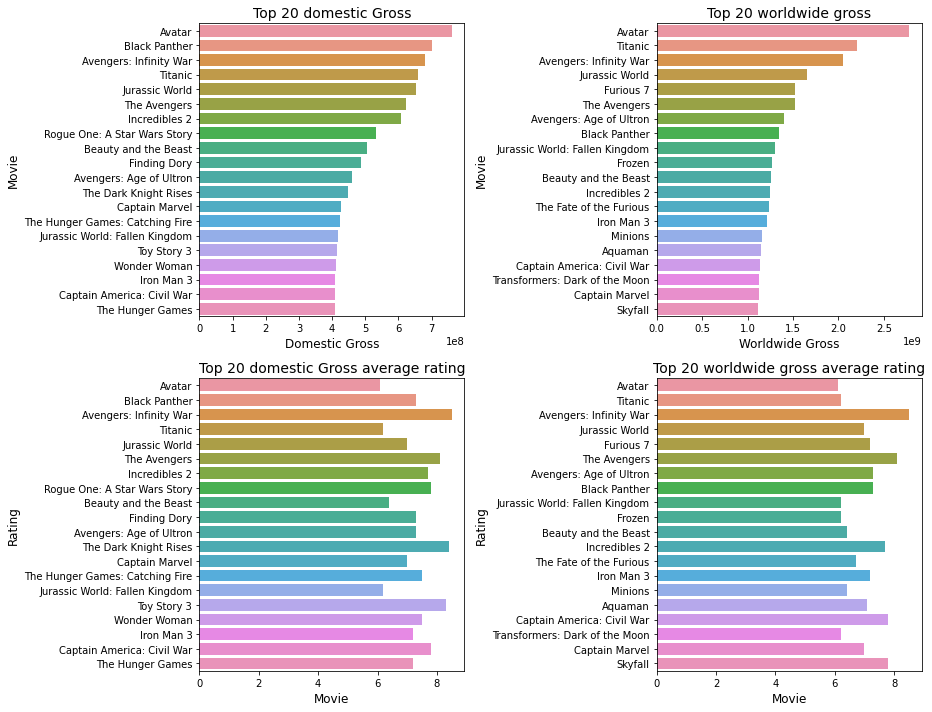

In [284]:
# plot to show top 20 movies by domestic and worldwide gross with their ratings

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(13, 10))

ax1 = ax[0][0]
ax2 = ax[0][1]
ax3 = ax[1][0]
ax4 = ax[1][1]

sns.barplot(x="domestic_gross", y="movie", data=top_20_domestic, ax=ax1)
ax1.set_xlabel('Domestic Gross', fontsize=12)
ax1.set_ylabel('Movie', fontsize=12)
ax1.set_title('Top 20 domestic Gross', fontsize=14)

sns.barplot(x="worldwide_gross", y="movie", data=top_20_worldwide, ax=ax2)
ax2.set_xlabel('Worldwide Gross', fontsize=12)
ax2.set_ylabel('Movie', fontsize=12)
ax2.set_title('Top 20 worldwide gross', fontsize=14)

sns.barplot(x="averagerating", y="movie", data=top_20_domestic, ax=ax3)
ax3.set_xlabel('Movie', fontsize=12)
ax3.set_ylabel('Rating', fontsize=12)
ax3.set_title('Top 20 domestic Gross average rating', fontsize=14)

sns.barplot(x="averagerating", y="movie", data=top_20_worldwide, ax=ax4)
ax4.set_xlabel('Movie', fontsize=12)
ax4.set_ylabel('Rating', fontsize=12)
ax4.set_title('Top 20 worldwide gross average rating', fontsize=14)
plt.tight_layout()
plt.show()

In [285]:
# top 20 movies by name
worldwide = list(top_20_worldwide['movie'])
domestic = list(top_20_domestic['movie'])

foreign = lists_diff(worldwide, domestic)

print("Top 20 domestic: \n=================\n", domestic)
print()
print("Top 20 World wide: \n==================\n", worldwide)
print()
print("Foreign only: \n===============\n", foreign)

Top 20 domestic: 
 ['Avatar', 'Black Panther', 'Avengers: Infinity War', 'Titanic', 'Jurassic World', 'The Avengers', 'Incredibles 2', 'Rogue One: A Star Wars Story', 'Beauty and the Beast', 'Finding Dory', 'Avengers: Age of Ultron', 'The Dark Knight Rises', 'Captain Marvel', 'The Hunger Games: Catching Fire', 'Jurassic World: Fallen Kingdom', 'Toy Story 3', 'Wonder Woman', 'Iron Man 3', 'Captain America: Civil War', 'The Hunger Games']

Top 20 World wide: 
 ['Avatar', 'Titanic', 'Avengers: Infinity War', 'Jurassic World', 'Furious 7', 'The Avengers', 'Avengers: Age of Ultron', 'Black Panther', 'Jurassic World: Fallen Kingdom', 'Frozen', 'Beauty and the Beast', 'Incredibles 2', 'The Fate of the Furious', 'Iron Man 3', 'Minions', 'Aquaman', 'Captain America: Civil War', 'Transformers: Dark of the Moon', 'Captain Marvel', 'Skyfall']

Foreign only: 
 ['Frozen', 'Minions', 'The Fate of the Furious', 'Furious 7', 'Aquaman', 'Transformers: Dark of the Moon', 'Skyfall']


In [286]:
# best performing movie overall is 'Avatar'
top_20_worldwide[top_20_worldwide['movie'] == 'Avatar']

,movie,genres,averagerating,release_date,release_year,release_month,production_budget,domestic_gross,worldwide_gross,profit
1279,Avatar,Horror,6.1,"Dec 18, 2009",2009,Dec,425000000,760507625,2776345279,2351345279


After succesfull analysis we get the following findings:

### Top 20 best performing movies in gross returns
***
| Worldwide gross | Domestic gross |
|:----------|:----------|
| Avatar | Avatar |
| Titanic | Black Panther |
| Avengers: Infinity War | Avengers: Infinity War |
| Jurassic World | Titanic |
| Furious 7 | Jurassic World |
| The Avengers | The Avengers |
| Avengers: Age of Ultron | Incredibles 2 |
| Black Panther | Rogue One: A Star Wars Story |
| Jurassic World: Fallen Kingdom | Beauty and the Beast |
| Frozen | Finding Dory |
| Beauty and the Beast | Avengers: Age of Ultron |
| Incredibles 2 | The Dark Knight Rises |
| The Fate of the Furious | Captain Marvel |
| Iron Man 3 | The Hunger Games: Catching Fire |
| Minions | Jurassic World: Fallen Kingdom |
| Aquaman | Toy Story 3 |
| Captain America: Civil War | Wonder Woman |
| Transformers: Dark of the Moon | Iron Man 3 |
| Captain Marvel | Captain America: Civil War |
| Skyfall | The Hunger Games |

Movies that did well foreign wise (outside country of production) 
- Skyfall
- Aquaman
- The Fate of the Furious
- Minions
- Furious 7
- Transformers: Dark of the Moon
- Frozen

The best performing movie overall was `Avatar` with the following characteristics:

- Movie: `Avatar`
- Genres: `Horror`
- Average rating: `6.1`
- Release year: `Dec 18, 2009`
- Budget: `$425,000,000$`
- Domestic gross: `$760,507,625$`
- Worldwide gross: `$2,776,345,279$`
- Profit: `$2,351,345,279$`

Lets now look at their characteristics, starting with their genres:

In [287]:
def genres_list(genres):
    """Function that tokenizes  the genres and returns
    list of the unique genres.
    (delimiter=',')
    Args:
        genres (list)
    Returns:
        list of unique genres
    """
    string = ",".join((genres))
    gen_list = string.split(",")
    unique_genres = list(set(gen_list))

    return unique_genres

In [288]:
# genres that did the best
best_genres_domestic = genres_list(list(top_20_domestic['genres']))
best_genres_worldwide = genres_list(list(top_20_worldwide['genres']))
best_genres_foreign = lists_diff(best_genres_worldwide, best_genres_domestic)

print("best genres domestic: \n======================\n", best_genres_domestic)
print()
print("best genres worldwide: \n======================\n", best_genres_worldwide)
print()
print("best genres foreign: \n======================\n", best_genres_foreign)

best genres domestic: 
 ['Adventure', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Action', 'Horror', 'Comedy', 'Drama', 'Sci-Fi']

best genres worldwide: 
 ['Adventure', 'Thriller', 'Animation', 'Fantasy', 'Romance', 'Action', 'Horror', 'Comedy', 'Sport', 'Drama', 'Crime', 'Sci-Fi']

best genres foreign: 
 ['Crime', 'Sport']


In the top 20 movies in gross returns, we can see the following genres come up:
### Best performing Genres in Gross returns :
| Worldwide gross| Domestic gross |
|:----------|:-----------|
| Adventure  |  Adventure |
| Sci-Fi  |  Sci-Fi |
| Romance  |  Romance |
| Drama  |  Drama |
| Thriller  |  Fantasy |
| Horror  |  Horror |
| Fantasy  |  Thriller |
| Animation  |  Animation |
| Action  |  Action |
| Sport  |  Comedy |
| Comedy  |  __ |
| Crime  |  __ |

Best performing genres foreign-wise only:

| Foreign|
|:----------|
| Crime |
| Sport |

We now find the most occurring genre in the top 20 best performing movies:

In [289]:
# find genre counts in the top 20 best performing movies
worldwide_genre_counts = {}
domestic_genre_counts = {}

# worldwide genre counts
for genre in best_genres_worldwide:
    worldwide_genre_counts[genre] = sum(list(top_20_worldwide['genres'].str.contains(genre)))

# domestic genre counts
for genre in best_genres_domestic:
    domestic_genre_counts[genre] = sum(list(top_20_domestic['genres'].str.contains(genre)))

# Represent data in a dataframe sorted from the most popular genre to the least
df1 = pd.DataFrame(list(worldwide_genre_counts.items()), 
                  columns=['Genre', 'Count']).sort_values(by="Count", ascending=False)

df2 = pd.DataFrame(list(domestic_genre_counts.items()), 
                  columns=['Genre', 'Count']).sort_values(by="Count", ascending=False)

# set multi-level columns
comb_df = pd.concat([df1, df2], axis=1)
comb_df.columns = [['Worldwide', 'Worldwide', 'Domestic', 'Domestic'], ['Genre', 'Count', 'Genre', 'Count']]
comb_df

Worldwide         Domestic      
        Genre Count      Genre Count
0   Adventure    16  Adventure  17.0
1    Thriller     3   Thriller   1.0
2   Animation     2  Animation   3.0
3     Fantasy     2    Fantasy   2.0
4     Romance     1    Romance   1.0
5      Action    15     Action  15.0
6      Horror     1     Horror   1.0
7      Comedy     1     Comedy   2.0
8       Sport     1      Drama   1.0
9       Drama     2     Sci-Fi  12.0
10      Crime     2        NaN   NaN
11     Sci-Fi    10        NaN   NaN

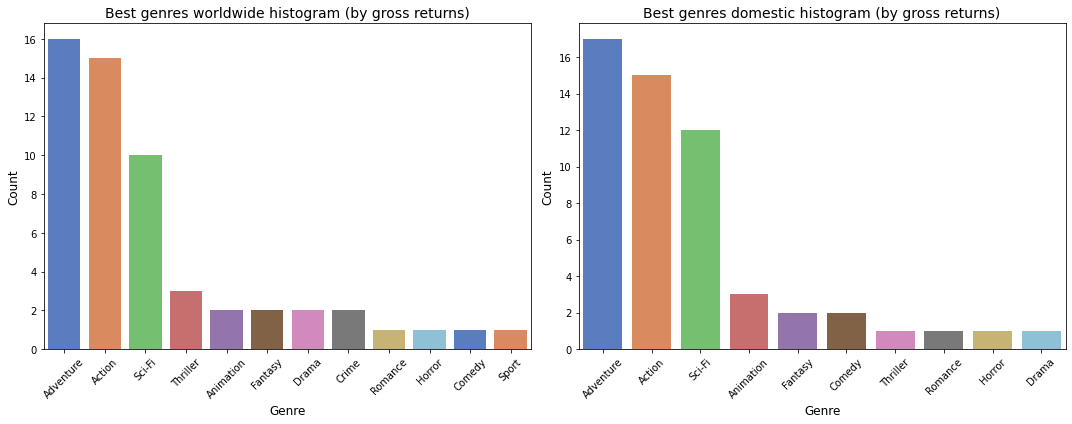

In [290]:
# plot histograms to show distributions of the genres
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

ax1 = ax[0]
ax2 = ax[1]

sns.barplot(x='Genre', y='Count', data=df1, palette='muted', ax=ax1)
ax1.set_xlabel('Genre', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.set_title('Best genres worldwide histogram (by gross returns)', fontsize=14)
ax1.tick_params(axis='x', rotation=45)

sns.barplot(x='Genre', y='Count', data=df2, palette='muted', ax=ax2)
ax2.set_xlabel('Genre', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.set_title('Best genres domestic histogram (by gross returns)', fontsize=14)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Top 5 best performing genres in terms of gross are:
- Worldwide gross
    ```
    - Adventure
    - Action
    - Scifi
    - Thriller
    - Drama
    ```
- Domestic gross
    ```
    - Adventure
    - Action
    - Scifi
    - Animation
    - Fantasy
    ```

**2. Which movie genres have been the most popular and successful over time?**

        What are the trends in genre preferences?
        What are the preferences of the target audience based on user ratings and reviews?
        What type of content resonates well with the audience?

To analyze the popularity and success of movie genres over time, these steps were followed:

- Group and Aggregate: Group the data by genre and year (extracted from the 'release_date' column) and calculate aggregate statistics such as the average rating or total revenue for each genre in each year.

- Visualization: create visualizations like line plots, bar plots, or heatmap to show the trends in genre preferences over time.

In [291]:
# Get most popular movie by year (using averagerating)
highest_rating_by_year = clean_data.groupby("release_year")['averagerating'].idxmax()
popular = clean_data.loc[highest_rating_by_year].sort_values(by="averagerating", ascending=False)
popular.head()

,movie,genres,averagerating,release_date,release_year,release_month,production_budget,domestic_gross,worldwide_gross,profit
684,The Wall,Documentary,9.2,"May 12, 2017",2017,May,3000000,1803064,4495262,1495262
2870,Richard III,Drama,9.1,"Dec 29, 1995",1995,Dec,9200000,2684904,4199334,-5000666
1804,Survivor,"Biography,Crime,Documentary",9.0,"May 29, 2015",2015,May,20000000,0,1703281,-18296719
1921,Frailty,Drama,9.0,"Apr 12, 2002",2002,Apr,11000000,13110448,19947280,8947280
1306,Frankenstein,Drama,9.0,"Nov 4, 1994",1994,Nov,45000000,22006296,112006296,67006296


In [292]:
# Get the most popular genres
popular_genre_counts = {}
for genre in unique_genres:
     popular_genre_counts[genre] = sum(list(popular['genres'].str.contains(genre)))

# most rated genres by rating
popular_genres = pd.DataFrame(list(popular_genre_counts.items()), columns=['Genre', 'Count'])
sorted_popular = popular_genres.sort_values(by='Count', ascending=False)
sorted_popular

,Genre,Count
14,Drama,32
2,Action,14
18,Documentary,11
7,Adventure,10
4,Comedy,9
21,Crime,6
5,Biography,6
0,Thriller,5
3,Family,4
19,Horror,4


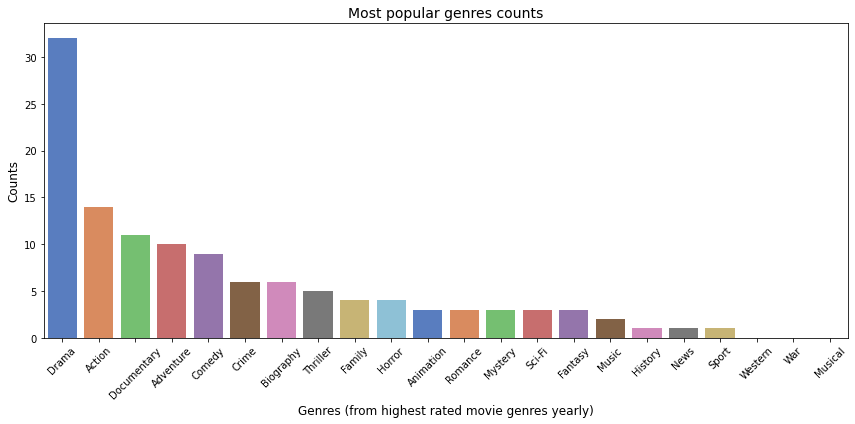

In [293]:
# Plot Most highly rated movie genres counts
plt.figure(figsize=(12,6))
sns.barplot(x='Genre', y='Count', data=sorted_popular, palette='muted')
plt.xlabel('Genres (from highest rated movie genres yearly)', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Most popular genres counts', fontsize=14)
plt.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

The top 5 most popular (highly rated yearly / most loved) genres are
- Drama
- Action
- Documentary
- Adventure
- Comedy

**3. How does the movie budget impact box office revenue, and can smaller budget films be profitable?****
- How does the movie budget affect box office revenue? 
-  Can smaller budget films be profitable, and is there an optimal budget range?


The first step is to investigate the relationship between movie budget and worldwide gross:
- We can do this with a scatterplot and calculate its subsequent **Pearson's correlation coefficient**

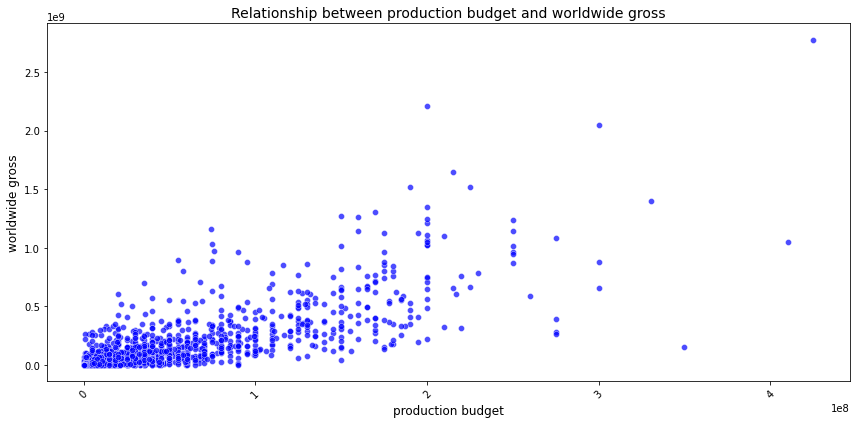

coerrelation coefficient:  0.784361866692055


In [294]:
"""
3. How does the movie budget impact box office revenue, and can smaller budget films be profitable?**
- i.) How does the movie budget affect box office revenue? 
- ii.) Can smaller budget films be profitable, and is there an optimal budget range?
"""
# i.) scatter plot to see relationship of movie budget and gross

plt.figure(figsize=(12,6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=clean_data, palette='muted', color='blue', alpha=0.7)
plt.xlabel('production budget', fontsize=12)
plt.ylabel('worldwide gross', fontsize=12)
plt.title('Relationship between production budget and worldwide gross', fontsize=14)
plt.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

coerrelation_coefficient = clean_data['production_budget'].corr(clean_data['worldwide_gross'])
print("coerrelation coefficient: ", coerrelation_coefficient)

- A correlation coefficient of approximately **0.78** between `production_budget` and 
`worldwide_gross` indicates a **strong positive linear correlation**. 
- This means that there is a significant and positive relationship between the movie's production budget and its worldwide box office revenue.

In [295]:
# - ii.) Can smaller budget films be profitable, and is there an optimal budget range?

movie_data = clean_data

# create new column which contains the profitability (True or False)
movie_data['profitable'] = movie_data['profit'] > 0

# find min and max valiues of budget
min_ = movie_data['production_budget'].min()
max_ = movie_data['production_budget'].max()

# iterable object containing 5 intervals between the min and max
bin_edges = range(1400, 425000000, (max_ // 5))

# Create budget bins the data into the bins and calculate the mean profitability for each bin
# This gets the mean in each budget bin
budget_bins = pd.cut(movie_data['production_budget'], bin_edges)
profitable_percentage_by_budget = movie_data.groupby(budget_bins)['profitable'].mean() * 100

# Create a dataframe from it
profitabilty = pd.DataFrame(list(profitable_percentage_by_budget.items()), columns=['budget_range', 'profitability(%)'])

# clean the budget range string
profitabilty['budget_range'] = profitabilty['budget_range'].astype(str).map(lambda x: x.strip("(]")).str.replace(", ", " - ")

def currency_convert(string):
    """Function that parses the string to a currency format"""
    values = string.split("-")
    first = int(values[0])
    second = int(values[1])
    return f"{first:,}- {second:,}"

profitabilty['budget_range'] = profitabilty['budget_range'].map(lambda x: currency_convert(x))
profitabilty

,budget_range,profitability(%)
0,"1,400- 85,001,400",58.663883
1,"85,001,400- 170,001,400",91.005291
2,"170,001,400- 255,001,400",96.969697
3,"255,001,400- 340,001,400",88.888889


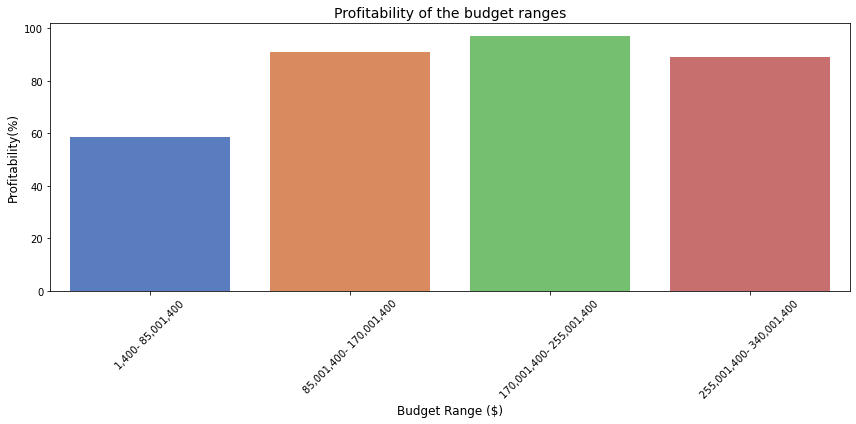

In [296]:
# plot the bar graphs of the profitabiltiy of the various budget ranges

plt.figure(figsize=(12,6))
sns.barplot(x='budget_range', y='profitability(%)', data=profitabilty, palette='muted')
plt.xlabel('Budget Range ($)', fontsize=12)
plt.ylabel('Profitability(%)', fontsize=12)
plt.title('Profitability of the budget ranges', fontsize=14)
plt.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

The findings from this analysis indicate that the optimal budget range is: $170,001,400$ - $255,001,400$

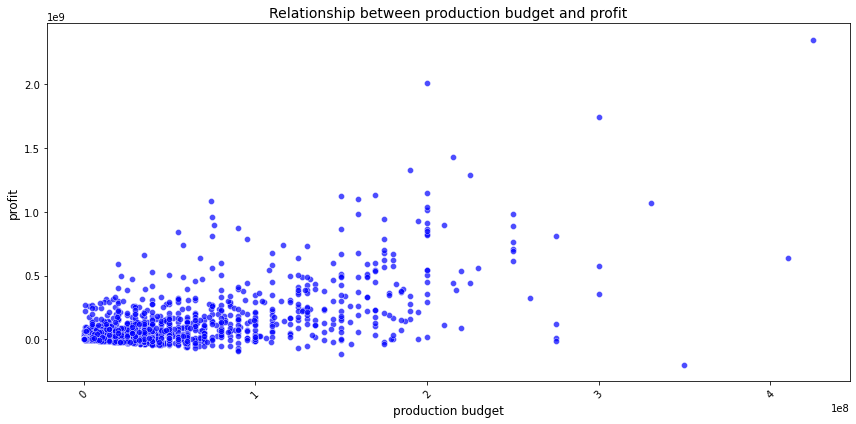

coerrelation coefficient:  0.6637236053964372


In [297]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='production_budget', y='profit', data=clean_data, palette='muted', color='blue', alpha=0.7)
plt.xlabel('production budget', fontsize=12)
plt.ylabel('profit', fontsize=12)
plt.title('Relationship between production budget and profit', fontsize=14)
plt.tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

coerrelation_coefficient = clean_data['production_budget'].corr(clean_data['profit'])
print("coerrelation coefficient: ", coerrelation_coefficient)

The **correlation coefficient** of approximately **0.66** between `profitability` and 
`production budget` indicates a **moderately positive linear correlation**.
- This means that there is a positive relationship between a movie's production budget and its profitability.

Finally,

**4. Are there seasonal trends in movie performance, and when is the best time to release a movie?**
- Are there seasonal patterns in movie performance? 
- When is the best time to release a movie for maximum revenue?


To analyze seasonal trends in movie performance and determine the best time to release a movie for maximum revenue, we use the `release_date` column from the dataset. Here's we can approach this analysis:

- Group Data by **Release Month**: Group the data by `Release_Month` and calculate aggregate statistics such as:
    - average 'worldwide_gross', 
    - total number of movies released, and 
    - average 'averagerating' for each month.

- Visualize Seasonal Trends: Plot bar charts or line plots to visualize the seasonal trends in movie performance, such as box office revenue and audience ratings, across different months.

In [298]:
"""
4. Are there seasonal trends in movie performance, and when is the best time to release a movie?**
- Are there seasonal patterns in movie performance? 
- When is the best time to release a movie for maximum revenue?
"""
# index the months to be able to sort by them
months = {'Jan': 0   , 'Feb': 1 , 'Mar': 2 , 'Apr': 3 , 'May': 4 , 'Jun': 5 , 'Jul': 6 , 'Aug': 7 , 'Sep': 8 , 'Oct': 9 , 'Nov':10, 'Dec':11 }

# find the aggregate statistics (mean, count) of the gross, rating and mothly movie count
seasonal_trends = clean_data.groupby('release_month').agg({
                        'worldwide_gross': 'mean',  # Average worldwide gross
                        'averagerating': 'mean',    # Average rating
                        'movie': 'count'            # Total number of movies released
                    }).reset_index()
seasonal_trends['month_idx'] = seasonal_trends['release_month'].map(lambda x: months[x.strip(" ")])
seasonal_trends = seasonal_trends.sort_values(by="month_idx")
seasonal_trends

,release_month,worldwide_gross,averagerating,movie,month_idx
4,Jan,6.359501e+07,5.977941,136,0
3,Feb,9.939148e+07,6.170064,157,1
7,Mar,1.158963e+08,6.150802,187,2
0,Apr,9.319892e+07,6.250549,182,3
8,May,1.844585e+08,6.241096,146,4
6,Jun,1.874210e+08,6.280571,175,5
5,Jul,1.539414e+08,6.252047,171,6
1,Aug,7.243753e+07,6.137912,182,7
11,Sep,5.922432e+07,6.304839,186,8
10,Oct,6.486754e+07,6.265094,212,9


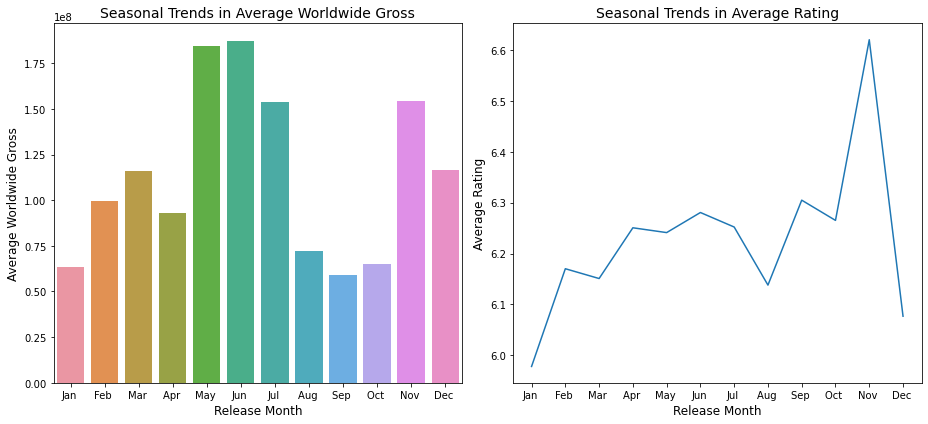

In [299]:
# plot seasonal (monthly) trends in gross and rating

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = ax[0]
ax2 = ax[1]

sns.barplot(x="release_month", y="worldwide_gross", data=seasonal_trends, ax=ax1)
ax1.set_xlabel('Release Month', fontsize=12)
ax1.set_ylabel('Average Worldwide Gross', fontsize=12)
ax1.set_title('Seasonal Trends in Average Worldwide Gross', fontsize=14)

sns.lineplot(x="release_month", y="averagerating", data=seasonal_trends, ax=ax2)
ax2.set_xlabel('Release Month', fontsize=12)
ax2.set_ylabel('Average Rating', fontsize=12)
ax2.set_title('Seasonal Trends in Average Rating', fontsize=14)

plt.tight_layout()
plt.show()

**1. Months with Higher Average Worldwide Gross:**

- **June (Jun)** has the highest average worldwide gross among all months, followed closely by **May (May)** and **December (Dec)**.
- These months could be considered the best time to release a movie for maximum revenue, as they tend to generate higher box office gross on average.

**2. Months with Higher Average Rating:**

- **November (Nov)** has the highest average rating among all months, followed by **June (Jun)** and **May (May)**.
- **November** seems to be a favorable month for releasing movies that receive higher audience ratings on average.

**3. Seasonal Patterns:**

- Summer months ***(June, July, and August)*** show *strong performance* in terms of both average worldwide gross and
average rating. 
- This could be due to the summer vacation period and increased movie going during this time.
- **December**, being the holiday season, also exhibits high average worldwide gross and average rating, making it 
a potential lucrative period for movie releases.


The following is a heat map plot showing the relationship between the variables of interest namely:
- `production_budget`
- `domestic_gross`
- `worldwide_gross`
- `averagerating`

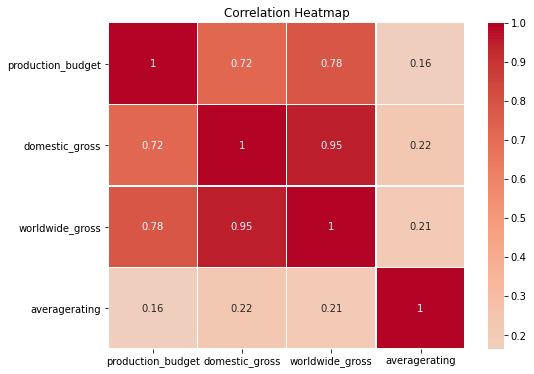

In [300]:
# heat map of the 4 variables
# New DataFrame
df = clean_data[[
    'production_budget',
    'domestic_gross',
    'worldwide_gross',
    'averagerating'
]]

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Based on the correlation coefficients, we can interpret the following relationships between the variables:

- **Budget** and **Domestic Gross**: The correlation coefficient is **0.25**. There is a **weak positive correlation** between the movie's budget and its domestic gross. This suggests that, on average, movies with higher budgets tend to have slightly higher domestic grosses, but the relationship is not very strong.

- **Budget** and **Worldwide Gross**: The correlation coefficient is **0.78**. There is a **strong positive correlation** between the movie's budget and its worldwide gross. This indicates that movies with higher budgets are more likely to have significantly higher worldwide grosses.

- **Domestic Gross** and **Worldwide Gross**: The correlation coefficient is **0.95**. There is a **very strong positive correlation** between a movie's domestic gross and its worldwide gross. This means that movies that perform well in the domestic market are highly likely to perform similarly well in the worldwide market.

- **Domestic Gross** and **Average Rating**: The correlation coefficient is **0.25**. There is a **weak positive correlation** between a movie's domestic gross and its average rating. This suggests that movies with higher domestic grosses may slightly tend to have slightly higher average ratings, but the relationship is not very strong.

- **Worldwide Gross** and **Average Rating**: The correlation coefficient is **0.24**. There is a **weak positive correlation** between a movie's worldwide gross and its average rating. This indicates that movies with higher worldwide grosses may slightly tend to have slightly higher average ratings, but the relationship is not very strong.


- Overall, the correlation coefficients provide insights into the relationships between the variables in the dataset. However, it's important to note that correlation does not imply causation. The relationships observed are based on statistical associations, and other factors not captured in the dataset may influence movie performance and ratings. Therefore, while the correlation coefficients provide valuable information, it's essential to consider other factors and conduct further analysis to make informed decisions for the business.






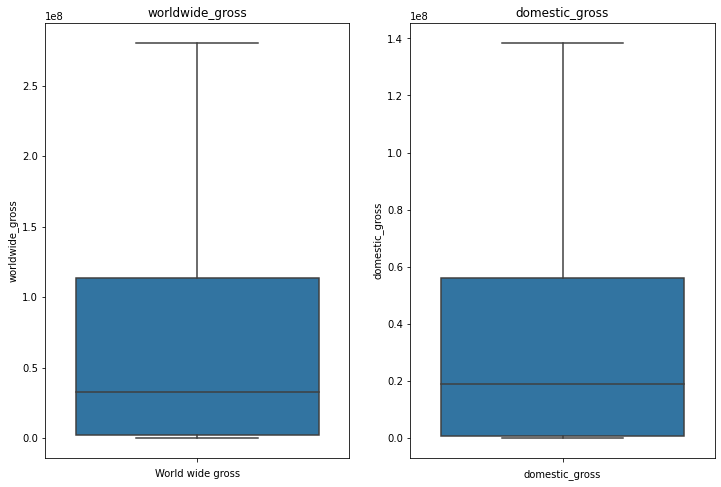

,worldwide_gross,domestic_gross
mean,1.128406e+08,4.648904e+07
std,2.167587e+08,7.820946e+07
min,0.000000e+00,0.000000e+00
max,2.776345e+09,7.605076e+08


In [301]:
# box plot to describe bth the domestic and worldwide gross
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))

ax1 = ax[0]
ax2 = ax[1]

sns.boxplot(y=clean_data['worldwide_gross'], ax=ax1, showfliers = False)
sns.boxplot(y=clean_data['domestic_gross'], ax=ax2,showfliers = False)

# Label axes and set title
ax1.set_title("worldwide_gross")
ax2.set_title("domestic_gross")
ax1.set_xlabel("World wide gross")
ax2.set_xlabel("domestic_gross")

plt.show()

pd.concat([clean_data['worldwide_gross'].describe().loc[['mean', 'std', 'min', 'max']],
           clean_data['domestic_gross'].describe().loc[['mean', 'std', 'min', 'max']]], axis=1)

## Evaluation of the analysis
### 1. Interpretation of Results:

- The analysis provided valuable insights into the movie industry's performance, including popular genres, seasonal trends, and the impact of movie budget on box office revenue.
- The results identified specific genres that are currently performing well, enabling Microsoft's new movie studio to target high-demand genres.
- Seasonal trends highlighted the best months for movie releases to maximize revenue and audience ratings.
- The correlation analysis between budget and box office revenue offered valuable insights into the financial aspect of movie production.

### Findings:
**a.) What types of films are currently performing best at the box office (based on box office gross)?**
#### Top 20 best performing movies in gross returns
***
| Worldwide gross | Domestic gross |
|:----------|:----------|
| Avatar | Avatar |
| Titanic | Black Panther |
| Avengers: Infinity War | Avengers: Infinity War |
| Jurassic World | Titanic |
| Furious 7 | Jurassic World |
| The Avengers | The Avengers |
| Avengers: Age of Ultron | Incredibles 2 |
| Black Panther | Rogue One: A Star Wars Story |
| Jurassic World: Fallen Kingdom | Beauty and the Beast |
| Frozen | Finding Dory |
| Beauty and the Beast | Avengers: Age of Ultron |
| Incredibles 2 | The Dark Knight Rises |
| The Fate of the Furious | Captain Marvel |
| Iron Man 3 | The Hunger Games: Catching Fire |
| Minions | Jurassic World: Fallen Kingdom |
| Aquaman | Toy Story 3 |
| Captain America: Civil War | Wonder Woman |
| Transformers: Dark of the Moon | Iron Man 3 |
| Captain Marvel | Captain America: Civil War |
| Skyfall | The Hunger Games |

The best performing movie overall was `Avatar` with the following characteristics:
- Movie: `Avatar`
- Genres: `Horror`
- Average rating: `6.1`
- Release year: `Dec 18, 2009`
- Budget: `$425,000,000$`
- Domestic gross: `$760,507,625$`
- Worldwide gross: `$2,776,345,279$`
- Profit: `$2,351,345,279$`

 Best performing Genres in Gross returns :
| Worldwide gross| Domestic gross |
|:----------|:-----------|
| Adventure  |  Adventure |
| Sci-Fi  |  Sci-Fi |
| Romance  |  Romance |
| Drama  |  Drama |
| Thriller  |  Fantasy |
| Horror  |  Horror |
| Fantasy  |  Thriller |
| Animation  |  Animation |
| Action  |  Action |
| Sport  |  Comedy |
| Comedy  |  __ |
| Crime  |  __ |

### Top 5 best performing genres in terms of gross are:
- Worldwide gross
    ```
    - Adventure
    - Action
    - Scifi
    - Thriller
    - Drama
    ```
- Domestic gross
    ```
    - Adventure
    - Action
    - Scifi
    - Animation
    - Fantasy
    ```
    
**b.) Which movie genres have been the most popular and successful over time?**

The top 5 most popular (highly rated yearly / most loved) genres are
- Drama
- Action
- Documentary
- Adventure
- Comedy

**c.) How does the movie budget impact box office revenue, and can smaller budget films be profitable?**

- A correlation coefficient of approximately **0.78** between `production_budget` and 
`worldwide_gross` indicates a **strong positive linear correlation**. 
- This means that there is a significant and positive relationship between the movie's production budget and its worldwide box office revenue.
- The optimal budget range is: $170,001,400$ - $255,001,400$
- The **correlation coefficient** of approximately **0.66** between `profitability` and 
`production budget` indicates a **moderately positive linear correlation**.
- This means that there is a positive relationship between a movie's production budget and its profitability.

**d.) Are there seasonal trends in movie performance, and when is the best time to release a movie?**

- **Months with Higher Average Worldwide Gross:**

    - **June (Jun)** has the highest average worldwide gross among all months, followed closely by **May (May)** and **December (Dec)**.
    - These months could be considered the best time to release a movie for maximum revenue, as they tend to generate higher box office gross on average.

- **Months with Higher Average Rating:**

    - **November (Nov)** has the highest average rating among all months, followed by **June (Jun)** and **May (May)**.
    - **November** seems to be a favorable month for releasing movies that receive higher audience ratings on average.

- **Seasonal Patterns:**
    - Summer months ***(June, July, and August)*** show *strong performance* in terms of both average worldwide gross and
    average rating. 
    - This could be due to the summer vacation period and increased movie going during this time.
    - **December**, being the holiday season, also exhibits high average worldwide gross and average rating, making it 
    a potential lucrative period for movie releases.

### 2. Model Fit and Performance:

- The model's fit depends on the quality of the data, the assumptions made, and the methodologies used in the analysis. Thorough data cleaning, handling of missing values, and outlier treatment are crucial for reliable results.
- Comparing the model's performance against a baseline can help measure its effectiveness. The baseline could be simple heuristics or prior industry knowledge.

### 3. Generalization of Results:

- The results are based on the data available and the analysis performed. To confidently generalize beyond the data, additional external validation using other datasets or testing on a separate hold-out dataset is necessary.
- The analysis may also require validation over time to ensure the observed trends are not limited to a specific period.

### 4. Business Impact:
- Given the objective credibility of the data source (imdb and The Numbers), this model is bound to benefit the business, since analysis was made on cleaned data without too much inconsistency.
- Also, most of the variables used in the analysis, such as movie genres, average rating, release dates, production budgets, and box office gross, directly impact the success of a movie in the market. These variables are critical determinants of a movie's performance and financial viability.
- By analyzing these variables, the movie studio can gain deeper insights into the preferences and behavior of the target  audience, helping them tailor their movie offerings to match audience expectations and demand. Understanding the relationships between variables, such as the correlation between movie budgets and box office revenue, allows the studio to make strategic decisions about resource allocation and risk management.

# Conclusions

## 1. Recommendations for the Business:

   Based on the analysis conducted, the following recommendations are made for Microsoft's new movie studio:

   a.) **Focus on Popular Genres**: Allocate resources to produce movies in genres that are currently performing well based on box office gross and audience ratings. This can increase the likelihood of commercial success and positive audience reception.
   
   - The genres that are likely to perform well are:
     - Action
     - Adventure
     - Animation
     - Comedy
     - Documentary
     - Drama
     - Fantasy
     - Scifi
     - Thriller

       

   b.) **Optimize Release Timing**: Use the insights from seasonal trends to strategically plan movie releases. Target months with historically higher average worldwide gross and audience ratings to maximize revenue and audience reach.
   
   - The best months of release are:
       - August
       - December
       - July
       - June
       - May
       - November

   c.) **Budget Allocation**: Analyze the relationship between movie budgets and box office revenue to make informed decisions about budget allocation for different movie projects. This can help optimize resources and manage financial risks.
   
       - The safest budget range is: $170,001,400$ - $255,001,400$,  with the highest profitability index (**96.96%**).
***
Other Recommendations:
***
   d.) **Emphasize Audience Preferences**: Analyze user ratings and reviews to understand audience preferences and align movie production with content that resonates well with the target audience.

   e.) **Collaborate with Industry Experts**: Engage with industry experts and professionals to complement data-driven insights with creative expertise and market knowledge, ensuring a well-rounded approach to movie production.

## 2. Limitations of the Analysis:
   While the analysis provides valuable insights, certain limitations should be considered:

   a.) **Data Quality**: The accuracy and completeness of the analysis depend on the quality of the data used. Incomplete or biased data could impact the reliability of the results.

   b.) **External Factors**: The movie industry is influenced by various external factors, such as competitor strategies, economic conditions, and cultural events, which are not directly captured in the analysis.

   c.) **Subjective Nature**: Movie success involves subjective elements such as artistic creativity, storytelling, and audience emotional connection, which cannot be fully captured through data analysis alone.

## 3. Future Improvements:
   To enhance the project in the future, consider the following:

   a.) **Validation and Testing**: Validate the analysis results using external datasets or real-world performance. Testing the model on a separate hold-out dataset can help assess its generalizability.

   b.) **Incorporate Audience Sentiment Analysis**: Analyze audience sentiments and reviews using natural language processing techniques to gain deeper insights into audience preferences and reactions.

   c.) **Market Research**: Conduct market research and audience surveys to complement data analysis and gather qualitative feedback on movie preferences and expectations.

   d.) **Continuous Monitoring**: Continuously monitor movie performance and audience reactions to adapt strategies and improve decision-making based on real-time data.

   e.) **Expand Data Sources**: Consider incorporating data from other reliable sources, such as audience demographics and social media trends, to gain a comprehensive understanding of the target audience.

## Summary
In summary, the analysis provides valuable insights that can inform strategic decision-making for Microsoft's new movie studio. By combining data-driven insights with creative expertise and market research, the studio can enhance its chances of producing successful and profitable movies. 

However, it's essential to recognize the limitations of data analysis and consider external factors that influence movie success. Continuous improvement, validation, and collaboration with industry experts will strengthen the project's impact and help the studio thrive in the dynamic and competitive movie industry. Additionally, future enhancements in data sources and analytical techniques can further improve the accuracy and depth of the analysis, leading to more informed and effective decision-making for the movie studio.